
--- Testing model: random_forest ---
Mean Squared Error (MSE): 0.788918762163358


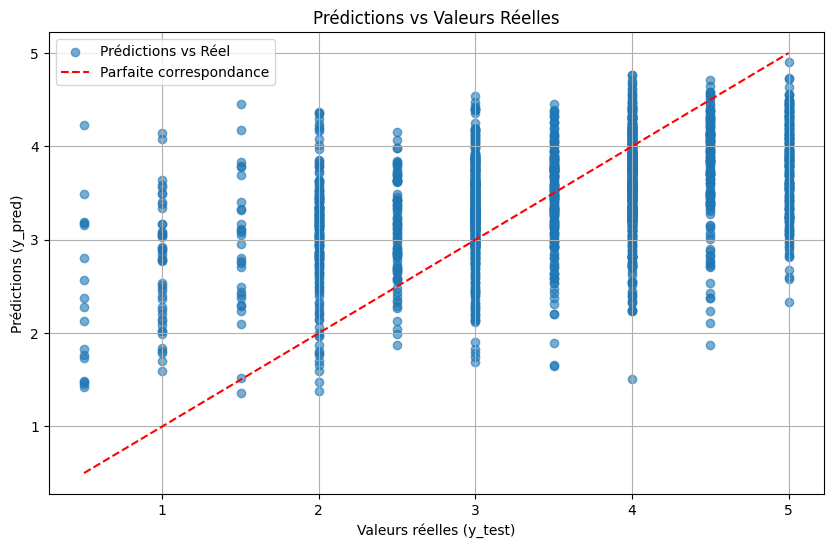

Model: random_forest, Recommended Movie: Lara Croft Tomb Raider: The Cradle of Life (2003), Top Genre: Action|Adventure|Comedy|Romance|Thriller

--- Testing model: linear_regression ---
Mean Squared Error (MSE): 1.0031098972662738


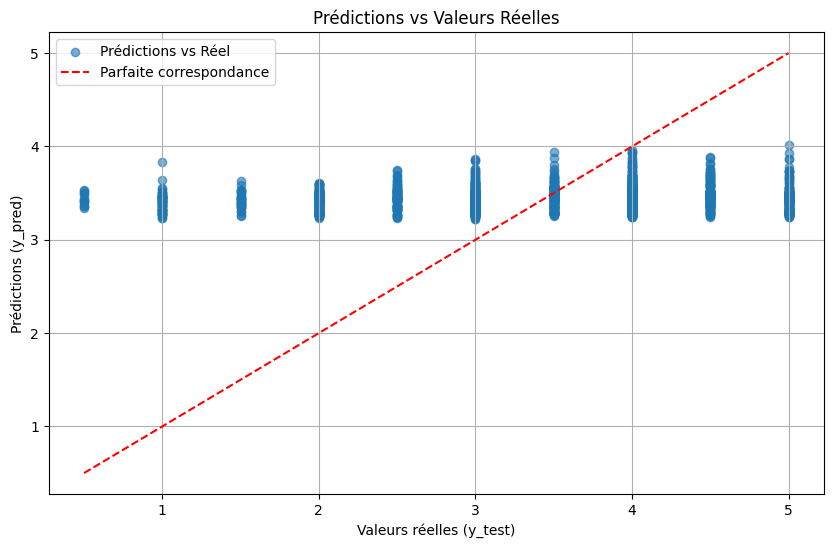

Model: linear_regression, Recommended Movie: Lara Croft Tomb Raider: The Cradle of Life (2003), Top Genre: Action|Adventure|Comedy|Romance|Thriller

--- Testing model: decision_tree ---
Mean Squared Error (MSE): 1.50425


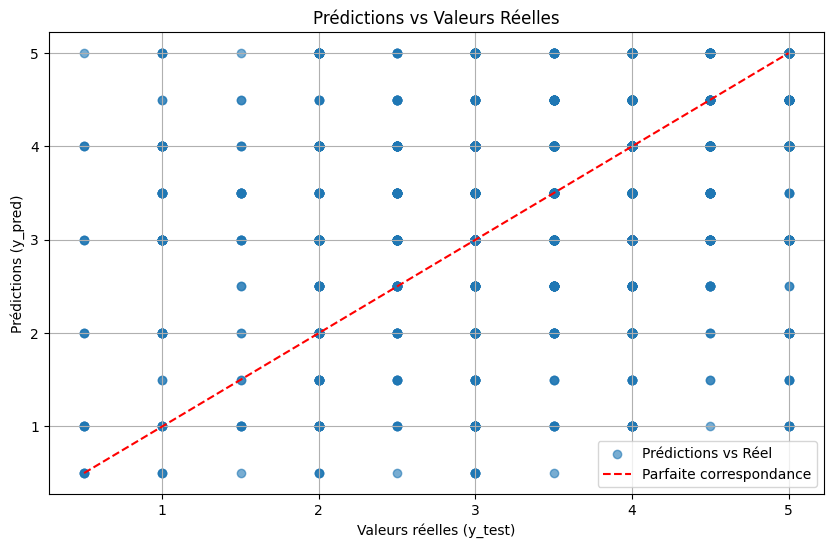

Model: decision_tree, Recommended Movie: Lara Croft Tomb Raider: The Cradle of Life (2003), Top Genre: Action|Adventure|Comedy|Romance|Thriller

--- Testing model: gradient_boosting ---
Mean Squared Error (MSE): 0.8414345377381115


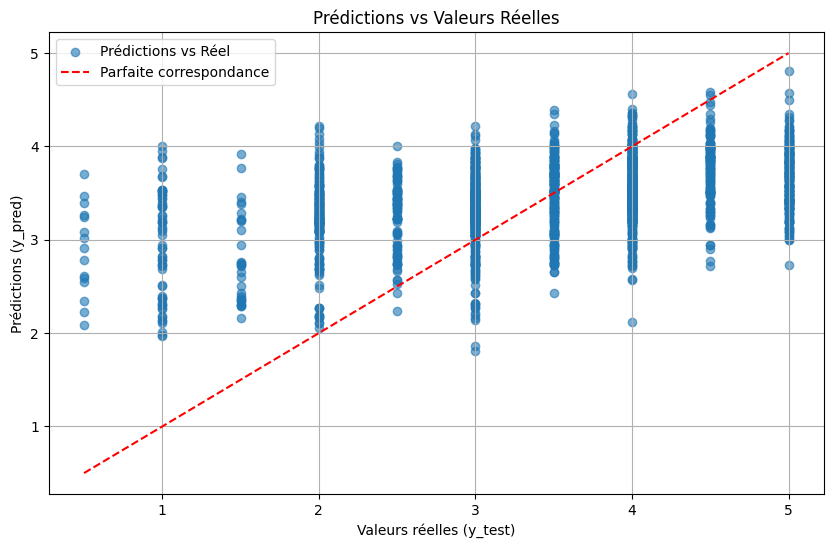

Model: gradient_boosting, Recommended Movie: Lara Croft Tomb Raider: The Cradle of Life (2003), Top Genre: Action|Adventure|Comedy|Romance|Thriller

--- Testing model: mlp ---
Mean Squared Error (MSE): 1.0052193438528731


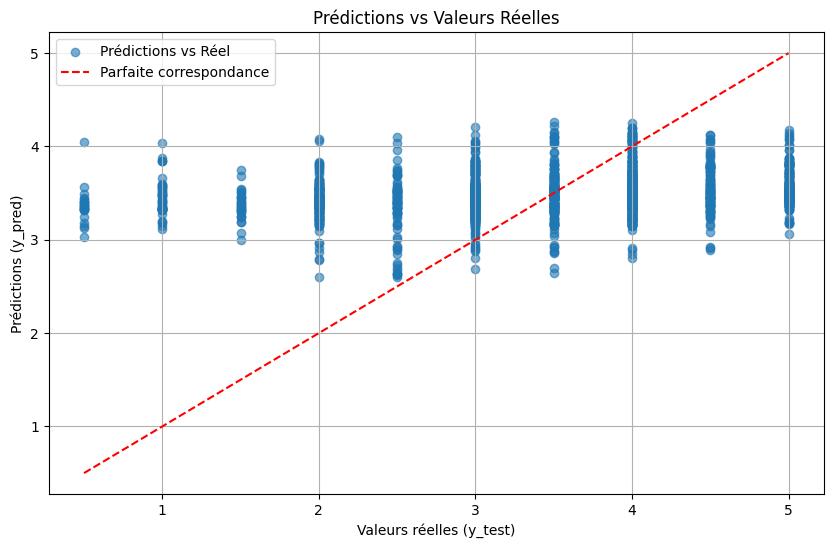

Model: mlp, Recommended Movie: Lara Croft Tomb Raider: The Cradle of Life (2003), Top Genre: Action|Adventure|Comedy|Romance|Thriller


In [1]:
from modelRecommendation import LightMovieRecommendationSystem
from utils import preprocess_genres
import pandas as pd

# Chemins des fichiers
PATH_WITH_GENRES = 'datas/ratings_with_genres.csv'
PATH_SEPARATE_GENRES = 'datas/ratings_with_genre_separated.csv'

# Chargement des données
nrows = 10_000
df_combined = pd.read_csv(PATH_WITH_GENRES, nrows=nrows)
df_separate = pd.read_csv(PATH_SEPARATE_GENRES, nrows=nrows)


# Liste des modèles à tester
model_types = [
    'random_forest',
    'linear_regression',
    'decision_tree',
    'gradient_boosting',
    'mlp'
]

# Dictionnaire pour stocker les performances
results = {}

# Prétraitement et fusion des données
df_merged = preprocess_genres(df_combined, df_separate)

for model_type in model_types:
    print(f"\n--- Testing model: {model_type} ---")

    try:
        # Initialisation du système de recommandation
        recomm_system = LightMovieRecommendationSystem(model_type=model_type)


        # Entraînement et évaluation
        recomm_system.train_recommendation_model(df_combined, df_merged)

        # Recommandation pour un utilisateur donné
        user_id = 2
        recommended_movie, top_genre = recomm_system.recommend_by_genre(df_merged, user_id)

        if recommended_movie:
            print(f"Model: {model_type}, Recommended Movie: {recommended_movie}, Top Genre: {top_genre}")
        else:
            print(f"Model: {model_type}, No recommendations available for user {user_id}")

    except Exception as e:
        print(f"Error with model {model_type}: {str(e)}")
        continue